In [5]:
D.<x> = PolynomialRing(QQ)
R.<x> = PolynomialRing(QQ)
Rx = PolynomialRing(QQ, 'x')
S = PowerSeriesRing(QQ,'x', default_prec=300)
L=LaurentSeriesRing(QQ,'x', default_prec=300)
#S.<x,y>=PowerSeriesRing(QQ,default_prec=300)
# Using "R = PolynomialRing(QQ,'x')" produces an error.
# Yet using S as defined here is fine (see definition of Fraleigh4 below)
# But S = PowerSeriesRing(QQ,'x','y') also produces an error.
R.<x> = PolynomialRing(QQ)
Scplx= PowerSeriesRing(CC,'x',default_prec=300)
def pochhammer(x,n):
    return product ([x+k for k in [0..n-1]])
def cRaleigh2(alpha,beta,nu):
    pchhmrA = pochhammer(alpha,nu)
    pchhmrB = pochhammer(beta,nu)
    fnu=factorial(nu)
    answer = D(pchhmrA*pchhmrB/fnu^2)
    return answer
def term(alpha,beta,p):
    return D(1/(alpha + p) + 1/(beta + p) - 2/(1 + p))
def eRaleigh(alpha, beta, nu):
    return D(sum([term(alpha, beta, p) for p in [0..nu - 1]]))
def FstarRaleigh2(alpha,beta,u,terms):
    fsr = sum([cRaleigh2(alpha, beta, nu)*eRaleigh(alpha,beta,nu)*u^nu for nu in [1..terms]])
    return D(fsr)
def Fraleigh2(alpha,beta,u,terms): 
    return D(sum([cRaleigh2(alpha,beta,nu)*u^nu for nu in [0..terms]]))
def FstarRaleigh3(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fsr2 = FstarRaleigh2(alpha,beta,x,n)
    return D(fsr2)
def Fraleigh4(n,m,x):
    alpha = (1/2-1/m)/2
    beta = (1/2+1/m)/2
    fr2 = Fraleigh2(alpha,beta,x,n)
    return D(fr2)
def exNo3c(n,m):
    a1 = S(x)*exp(S(FstarRaleigh3(n,m,x)/Fraleigh4(n,m,x))).O(2*n)
    # S(x) instead of x in df of a1 to avoid an error message
    # after use of the stripQuotationMarks command below.
    a2 = S(a1).O(n+1)
    return a2 # applying S to argument of exp is key.
def J(n,m):
    exn = exNo3c(n+2,m)
    jnm = 1/exn.reverse()
    return jnm.O(n+1) # Jtest is faster than J, and they agree.
def normalJ(n,m):
    f = J(n,m)
    return f.truncate(n+1)
def Jcoefficient(n,m):
    f = J(n+2,m)
    f1 = f.truncate(n+1)
    f1=f1.list()
    f1=Set(f1)
    g1 = f.truncate(n)
    g1 = g1.list()
    g1 = set(g1)
    h = f1.difference(g1)
    h = h.list()
    return h[0]
def xjNewStep(n,m): 
    f=J(n,m)
    fl=f.list()
    return (sum(c*x**i*(m**3*2**6)**i for i,c in enumerate(fl)))
def xjNew(n,m):
    return xjNewStep(n-1,m)
def xjNewCoefficient(n,m):
    if n>0:return (xjNew(n,m)-xjNew(n-1,m))/x^n
    if n==0:return 1
def xjNewTest(n,m):
    return D(xjNewStep(n-1,m))
def j(n,m):return xjNew(n,m)/x

def deltaStar(n,m):
    jay=j(n+1,m)
    djay=x*derivative(jay,x)
    numerator=djay^(2*m)
    denominator=jay^(2*m-2)*(jay-2^6*m^3)^m
    base=numerator/denominator
    xp=1/(m-2)
    power=S(base)^xp
    return (power.polynomial()).truncate(n+1)
def polynomialCoefficient(n,poly):
    return poly.list()[n]
def factorpairToFactor(factorpair):
    (monomial,exponent)=factorpair
    return monomial^exponent
def numericalfactor(polynomial):
    fp=polynomial.factor()
    lst=[factorpairToFactor(factorpair) for factorpair in fp]
    return polynomial/product(lst)
def lastfactor(polynomial):
    fp=polynomial.factor()
    fp=FiniteEnumeratedSet(fp)
    return factorpairToFactor(fp.last())
def reduced(polynomial):
    return numericalfactor(polynomial)*lastfactor(polynomial)
def stripQuotationMarks(string):
    var('x')
    return sage_eval(string,locals={'x':x})

def nieburTau(n):
# The contortions below sidestep mysterious (to me) error messages...
# nieburTau is an algorith for Ramanujan''s tau from the paper
# "A formula for Ramanujan's tau-function" by Douglas Niebur.
# (He spells tau with the Greek letter.)
    def step1(n,k):
        return 35*k^4-52*k^3*n+18*k^2*n^2
    def step2(n,k):
        return sigma(k)*sigma(n-k)
    def step3(n):
        ans=0
        for k in [1..n-1]:
            ans=ans+step1(n,k)*step2(n,k)
        return 24*ans
    return n^4*sigma(n)-step3(n)

def first(list):return list[0]
def last(list):return list[-1]

def rmnjntau(n):
    answer=0
    for k in [1..n-1]:
        answer=answer+(6*k-4*(n-k))*sigma(k,3)*sigma(n-k,5)
    answer=(5*sigma(n,3)+7*sigma(n,5))*n/12-35*answer
    return answer

def element(k,listo):
    if k>len(listo):return (print("bad k"))
    return listo[k-1]

def mobiusInverseOfFunction(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        f=f+moebius(dvk)*g(n/dvk)
    return f

def mobiusInverseOfList(g,n):
    dv=divisors(n)
    nd=len(dv)
    f=0
    for k in [1..nd]:
        dvk=element(k,dv)
        gndvk=element(n/dvk,g)
        f=f+moebius(dvk)*gndvk
    return f

def drop_first_element(listo):
    lenth=len(listo)
    answer=[]
    for k in [1..lenth-1]:
        answer=answer+[listo[k]]
    return answer

def factorSeriesFromLists(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
    return nswr

def factorSeriesFromListsWithTracking(lsst,bound):
    truncatedlist=drop_first_element(lsst)
    F=[element(1,truncatedlist)]
    nswr=[-mobiusInverseOfList(F,1)/1]
    for n in [2..bound]:
        summ=0
        for k in [1..n-1]:
            ekf=element(k,F)
            tnk=element(n-k,truncatedlist)
            summ=summ+ekf*tnk
            print((n,k))
        Fn=n*element(n,truncatedlist)-summ
        F=F+[Fn]
        xpn=-mobiusInverseOfList(F,n)/n
        nswr=nswr+[xpn]
        print("answer length: ",len(nswr))
    return nswr

def deltaInfty(n,m): 
    # definition 9.1 in the paper to power (m-2)
    # so, per remark 5 in paper v. 28jul21,
    # the weight is 12 for each m.
    jay=J(n,m)
    djay=x*derivative(jay,x)
    numerator=djay^(2*m)
    denominator=jay^(2*m-2)*(jay-1)^m
    answer=S((numerator/denominator)^(1/(m-2)))
    return answer.polynomial()
            
def deltaInftyStrike(n,m): 
    # substitute 2^6*m^3*x for x in def 9.1 of interpolations paper; not
    # yet defined in draft  21h28jul21
    f=deltaInfty(n,m)
    fl=f.list()
    df=f.degree()
    sm=sum(fl[k]*(x*m^3*2^6)^k for k in [0..df])
    dsm=sm.degree()
    sml=sm.list()
    notzero=[]
    for entry in sml:
        if (entry!=0):notzero=notzero+[entry]
    leadingterm=notzero[0]
    sm2=sum(fl[k]*(x*m^3*2^6)^k/leadingterm for k in [0..dsm])
    return sm2


print("ok")

ok


In [21]:
for m in [3..12]:
    print("-----------------------------------------------------------------------")
    print(deltaInftyStrike(5,m))

-----------------------------------------------------------------------
-16744*x^7 - 6048*x^6 + 4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x
-----------------------------------------------------------------------
17045651456*x^7 - 100663296*x^6 - 13762560*x^5 + 262144*x^4 + 3072*x^3 - 128*x^2 + x
-----------------------------------------------------------------------
29685769799000/9*x^7 - 80525128800*x^6 - 12041250*x^5 + 7688000/3*x^4 + 27900*x^3 - 360*x^2 + x
-----------------------------------------------------------------------
-175921860444160*x^7 - 1855425871872*x^6 + 1610612736*x^5 + 8388608*x^4 + 147456*x^3 - 768*x^2 + x
-----------------------------------------------------------------------
-6541831049019560*x^7 - 115045640877216/5*x^6 + 22718141950*x^5 - 11524800*x^4 + 543900*x^3 - 1400*x^2 + x
-----------------------------------------------------------------------
-4379913477007867904/45*x^7 - 1025860454842368/5*x^6 + 195066593280*x^5 - 740294656/3*x^4 + 1585152*x^3 - 2304*x^2

In [22]:
deltaInftyStrike(4,3)

-6048*x^6 + 4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x

In [23]:
deltaInftyStrike(4,4)

-100663296*x^6 - 13762560*x^5 + 262144*x^4 + 3072*x^3 - 128*x^2 + x

In [24]:
deltaInftyStrike(4,5)

-80525128800*x^6 - 12041250*x^5 + 7688000/3*x^4 + 27900*x^3 - 360*x^2 + x

In [25]:
poly=D(deltaInftyStrike(100,3))
data=[]
ls=poly.list()
for n in [1..len(ls)-1]:
    data=data+[polynomialCoefficient(n,poly)-rmnjntau(n)]
print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#from 'conjecture 7.ipynb' in 'interpolations paper' folder
import time
import pickle
wfile = open('/Users/barrybrent/run12aug21no1.txt','w') 
data=[]
start=time.time()
for m in [3..303]:
    ds=deltaInftyStrike(100,m)
    data=data+[[m,ds]]
    finish=time.time()
    print([m,finish-start])
s = pickle.dumps(str(data))
wfile.write(s)
wfile.close()

In [26]:
deltaInftyStrike(5,3)

-16744*x^7 - 6048*x^6 + 4830*x^5 - 1472*x^4 + 252*x^3 - 24*x^2 + x

In [27]:
import pickle
rfile = open('/Users/barrybrent/run12aug21no1.txt','rb')  # deltaInftyStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
for k in [0..len(s)-1]:
    m = s[k][0]
    poly=D(s[k][1])
    data=data+[[k,poly.degree()]]
print(data) # correctness check: all of the series have the right degree.

[[0, 102], [1, 102], [2, 102], [3, 102], [4, 102], [5, 102], [6, 102], [7, 102], [8, 102], [9, 102], [10, 102], [11, 102], [12, 102], [13, 102], [14, 102], [15, 102], [16, 102], [17, 102], [18, 102], [19, 102], [20, 102], [21, 102], [22, 102], [23, 102], [24, 102], [25, 102], [26, 102], [27, 102], [28, 102], [29, 102], [30, 102], [31, 102], [32, 102], [33, 102], [34, 102], [35, 102], [36, 102], [37, 102], [38, 102], [39, 102], [40, 102], [41, 102], [42, 102], [43, 102], [44, 102], [45, 102], [46, 102], [47, 102], [48, 102], [49, 102], [50, 102], [51, 102], [52, 102], [53, 102], [54, 102], [55, 102], [56, 102], [57, 102], [58, 102], [59, 102], [60, 102], [61, 102], [62, 102], [63, 102], [64, 102], [65, 102], [66, 102], [67, 102], [68, 102], [69, 102], [70, 102], [71, 102], [72, 102], [73, 102], [74, 102], [75, 102], [76, 102], [77, 102], [78, 102], [79, 102], [80, 102], [81, 102], [82, 102], [83, 102], [84, 102], [85, 102], [86, 102], [87, 102], [88, 102], [89, 102], [90, 102], [91, 102

In [34]:
R.<x> = PowerSeriesRing(ZZ)

bound=30
def g(n):return rmnjntau(n)
lstt=[]
for k in [1..bound]:
    print("k: ",k)
    print("g(k): ",g(k))
    lstt=lstt+[g(k)]
print("lsst: ",lstt)
bound=29
fs=factorSeriesFromLists(lstt,bound)
print("fs: ",fs)

k:  1
g(k):  1
k:  2
g(k):  -24
k:  3
g(k):  252
k:  4
g(k):  -1472
k:  5
g(k):  4830
k:  6
g(k):  -6048
k:  7
g(k):  -16744
k:  8
g(k):  84480
k:  9
g(k):  -113643
k:  10
g(k):  -115920
k:  11
g(k):  534612
k:  12
g(k):  -370944
k:  13
g(k):  -577738
k:  14
g(k):  401856
k:  15
g(k):  1217160
k:  16
g(k):  987136
k:  17
g(k):  -6905934
k:  18
g(k):  2727432
k:  19
g(k):  10661420
k:  20
g(k):  -7109760
k:  21
g(k):  -4219488
k:  22
g(k):  -12830688
k:  23
g(k):  18643272
k:  24
g(k):  21288960
k:  25
g(k):  -25499225
k:  26
g(k):  13865712
k:  27
g(k):  -73279080
k:  28
g(k):  24647168
k:  29
g(k):  128406630
k:  30
g(k):  -29211840
lsst:  [1, -24, 252, -1472, 4830, -6048, -16744, 84480, -113643, -115920, 534612, -370944, -577738, 401856, 1217160, 987136, -6905934, 2727432, 10661420, -7109760, -4219488, -12830688, 18643272, 21288960, -25499225, 13865712, -73279080, 24647168, 128406630, -29211840]
fs:  [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,

In [28]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/run12aug21no1.txt','rb')  # deltaInftyStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=5
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(pre_g(0))
print("=======================================================================")
dfeg=drop_first_element(g(0))
print(dfeg)
fs=factorSeriesFromLists(dfeg,bound-1)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print([m(0),fs])

41767088832*x^102 + 81742959102*x^101 + 37534859200*x^100 - 60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 + 611981400*x^50 - 1696965207*x^49 + 2487582

In [29]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/run12aug21no1.txt','rb')  # deltaInftyStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(pre_g(0))
print("=======================================================================")
dfeg=drop_first_element(g(0))
print(dfeg)
fs=factorSeriesFromLists(dfeg,bound-1)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print([m(0),fs])

41767088832*x^102 + 81742959102*x^101 + 37534859200*x^100 - 60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x^53 + 850430336*x^52 - 1740295368*x^51 + 611981400*x^50 - 1696965207*x^49 + 2487582

In [30]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/run12aug21no1.txt','rb')  # deltaInftyStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..2]:
    print("************************************************************************")
    print("index: ",index)
    print(pre_g(index))
    print("=======================================================================")
    dfeg=drop_first_element(g(index))
    print(dfeg)
    fs=factorSeriesFromLists(dfeg,bound-1)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print([m(index),fs])

************************************************************************
index:  0
41767088832*x^102 + 81742959102*x^101 + 37534859200*x^100 - 60754911516*x^99 + 40727164968*x^98 + 75013568546*x^97 - 49569988608*x^96 + 51494658600*x^95 - 64496363904*x^94 - 13316478336*x^93 - 27442896384*x^92 + 9673645072*x^91 + 13173496560*x^90 - 24992917110*x^89 + 45164021760*x^88 + 32358470760*x^87 + 411016992*x^86 - 33355661220*x^85 + 6211086336*x^84 - 29335099668*x^83 - 7394890608*x^82 + 1665188361*x^81 + 4767866880*x^80 + 38116845680*x^79 + 3494159424*x^78 - 8951543328*x^77 - 15693610240*x^76 - 6425804700*x^75 + 4373119536*x^74 + 1463791322*x^73 - 9600560640*x^72 + 9791485272*x^71 + 1940964480*x^70 + 4698104544*x^69 + 10165534848*x^68 - 15481826884*x^67 - 3233333376*x^66 - 2790474540*x^65 + 2699296768*x^64 + 1902838392*x^63 + 1268236032*x^62 + 6956478662*x^61 - 1791659520*x^60 - 5189203740*x^59 - 3081759120*x^58 + 2686677840*x^57 - 1414533120*x^56 + 2582175960*x^55 + 1758697920*x^54 - 1596055698*x

In [35]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/run12aug21no1.txt','rb')  # deltaInftyStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..2]:
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]
print(data)
print(len(data))

[[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]], [4, [128, 5056, 43648, 1701376, 10066304, 447368896, 2454267008, 124553199616, 794091716608, 26388274032448, 153531805478528, 9757798968372736, 38800242943499648, 1647030719639790016, 14757395258964277120, 562625694185864298496, 2500076373283929819008, 136423920615837000073216, 636276747165594302476928, 37718485571963236110959104, 235798102721024813448404608, 6752400214283815642637937856, 41336432616137915266196843648, 3063488950551549508009252028416, 12575093954264035662847293784064, 436851899155574420500280863640896, 3846145821136909354466769620697088, 154285392367892020138533673348834816, 68753

In [36]:
print(data[0])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]


In [37]:
print(data[1])

[4, [128, 5056, 43648, 1701376, 10066304, 447368896, 2454267008, 124553199616, 794091716608, 26388274032448, 153531805478528, 9757798968372736, 38800242943499648, 1647030719639790016, 14757395258964277120, 562625694185864298496, 2500076373283929819008, 136423920615837000073216, 636276747165594302476928, 37718485571963236110959104, 235798102721024813448404608, 6752400214283815642637937856, 41336432616137915266196843648, 3063488950551549508009252028416, 12575093954264035662847293784064, 436851899155574420500280863640896, 3846145821136909354466769620697088, 154285392367892020138533673348834816, 687531721957715106674382962213971328, 42535295865117307925543119503306387520, 175629608733387594045612700609944883328, 10633823966279326982949143635118685945856, 63354389768552906652090108677937394872448, 1844730760907864046633138421866990880254016, 15291939564706713011338778244101733111809408, 837516875233705624648717652053677748692975616, 2931643909341971647579181991301665685542939008, 1201892793

In [38]:
print(data[2])

[5, [360, 36720, 8835640/3, 61867800, 12085498728, 381806363760, 123097894919640/7, 16449606366345000/7, 541680885462341000/21, 44888068297520427792/7, 2474077945965784990680/7, 100729036560577415889400/21, 122779267673645951141247480/91, 2400435485649929360345042640/91, 5429697159341995853444386603864/1911, 156833029222257513134390862675000/637, 31356450699454008610602987806020680/10829, 23105852255797506472255186213261546000/32487, 254417526380975032340460017561134663240/10829, 535117109274365809543331074135848874520/833, 63438792682032574344809337449556136154120/357, 201764581738542964745809790454179783291519440/75803, 481393237568258715322522633576298291153097710920/1743469, 95185052405480783198507148583475879899450425385000/5230407, 61762292156694707143766377614212604874213234262120/134113, 168853039697970984369369122421464776841834994267870640/1743469, 334110552969689152062296255204568609933060994188426625000/203985873, 391094472789545718628186342873880400339207777496063794200/41

In [39]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/run12aug21no1.txt','rb')  # deltaInftyStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
print(len(s))

301


In [40]:
print(g(300))

[0, 1, -219616824, 20941597501020252, -1294929637569100921646272, 69144885478122587383994665744830, -3336429990329559427617860239057450319136, 137670685559444728985391199927359505344199080920, -38765580439505435847450822288727163196384673059520406016/7, 223058492871218518207707613314932198930702677021653449508999861, -7947686641426523635737898495257356114903728959756291345416241394930320, 283036238548559453550701824834969562507382184388654277886344174438228211021812, -114416146418901208520561708121812800820538949016494301413830206301290684812381044920064/11, 3731263089553610297687641147020338933351124587507657311792001706872230317130853515952343139762/11, -1642194559792639781773300889276087679820880681783802586109909501064884491681259676757745740442044853952/143, 2834937505058323035214456966242269376854925943296162215426620961825176887638572405917756275382760492090342190520/7007, -1768557519945406016011661994528875398507487885885875545172956765067536549014916920253595688692720062633770

In [41]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/run12aug21no1.txt','rb')  # deltaInftyStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..3]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/26aug22.txt','wb')
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

index:  0
index:  1
index:  2
index:  3


In [43]:
import pickle
rfile = open('/Users/barrybrent/26aug22.txt','rb') # deltaInftyStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

4


In [44]:
import pickle
rfile = open('/Users/barrybrent/26aug22.txt','rb') # deltaInftyStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
for k in [0..3]:
    print(s[k])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]
[4, [128, 5056, 43648, 1701376, 10066304, 447368896, 2454267008, 124553199616, 794091716608, 26388274032448, 153531805478528, 9757798968372736, 38800242943499648, 1647030719639790016, 14757395258964277120, 562625694185864298496, 2500076373283929819008, 136423920615837000073216, 636276747165594302476928, 37718485571963236110959104, 235798102721024813448404608, 6752400214283815642637937856, 41336432616137915266196843648, 3063488950551549508009252028416, 12575093954264035662847293784064, 436851899155574420500280863640896, 3846145821136909354466769620697088, 154285392367892020138533673348834816, 6875317

In [45]:
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/run12aug21no1.txt','rb')  # deltaInftyStrike series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=98
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..300]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/26aug22no2.txt','wb') # deltaInftyStrike product exponents
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

index:  0
index:  1
index:  2
index:  3
index:  4
index:  5
index:  6
index:  7
index:  8
index:  9
index:  10
index:  11
index:  12
index:  13
index:  14
index:  15
index:  16
index:  17
index:  18
index:  19
index:  20
index:  21
index:  22
index:  23
index:  24
index:  25
index:  26
index:  27
index:  28
index:  29
index:  30
index:  31
index:  32
index:  33
index:  34
index:  35
index:  36
index:  37
index:  38
index:  39
index:  40
index:  41
index:  42
index:  43
index:  44
index:  45
index:  46
index:  47
index:  48
index:  49
index:  50
index:  51
index:  52
index:  53
index:  54
index:  55
index:  56
index:  57
index:  58
index:  59
index:  60
index:  61
index:  62
index:  63
index:  64
index:  65
index:  66
index:  67
index:  68
index:  69
index:  70
index:  71
index:  72
index:  73
index:  74
index:  75
index:  76
index:  77
index:  78
index:  79
index:  80
index:  81
index:  82
index:  83
index:  84
index:  85
index:  86
index:  87
index:  88
index:  89
index:  90
index:  9

In [46]:
import pickle
rfile = open('/Users/barrybrent/26aug22no2.txt','rb') # deltaInftyStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(len(s))

301


In [47]:
import pickle
rfile = open('/Users/barrybrent/26aug22no2.txt','rb') # deltaInftyStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(s[0])

[3, [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]]


In [48]:
import pickle
rfile = open('/Users/barrybrent/26aug22no2.txt','rb') # deltaInftyStrike product exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
print(s[300])

[303, [219616824, 3174177081094824, 226622402335239601562424, 6043596720155962560842905083624, 157807742300991235108607040507541424952, 2528649970358003673582112505906570296291980072, 814684884702562944137230394762568784076180741739664776/7, 4689123998768918680935845530973204365382017046083478056938216, 113687286845496176557021607751929879899451425819837090427530042453560, 1358791631856007618539257531733138166387624043025195535834848397572011811624, 732376706764001062543182889512319070926116145826072188104413817339085275238695619944/11, 31713986027331763843575622217027071288085339757155168753177661101596685848882461322893534840/11, 7255218106835357714880885351024982180575583908324299916575776406111076220571964524581795253067640392/143, 775294186761131167720960331735441051477080022906769459619225758400253788193812310528031314339541523253223912/1001, 8355429104080235010068521218567479277219233042104091667755046950912411631677865273432474832129924623613749131210568/143, 267178052066116344

In [2]:
import time
import pickle

data=[]
start=time.time()
for m in [3..600]:
    ds=deltaInftyStrike(200,m)
    data=data+[[m,ds]]
    finish=time.time()
    print([m,finish-start])
    
wfile = open('/Users/barrybrent/31aug22no2.txt','wb') # deltaInfinityStrike long series
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

[3, 16.152364015579224]
[4, 26.69880199432373]
[5, 47.693532943725586]
[6, 57.373229026794434]
[7, 82.15947222709656]
[8, 99.76726031303406]
[9, 124.96022009849548]
[10, 140.78114199638367]
[11, 166.4123980998993]
[12, 188.54715704917908]
[13, 215.75575804710388]
[14, 233.76433515548706]
[15, 263.8652322292328]
[16, 285.0523011684418]
[17, 314.80234026908875]
[18, 333.9426681995392]
[19, 362.2138600349426]
[20, 387.4984230995178]
[21, 418.8598852157593]
[22, 438.5006251335144]
[23, 467.0936360359192]
[24, 494.4552640914917]
[25, 525.5984539985657]
[26, 546.9759421348572]
[27, 578.2637670040131]
[28, 605.0398490428925]
[29, 634.448890209198]
[30, 657.188905954361]
[31, 686.1347961425781]
[32, 710.0352020263672]
[33, 743.8063371181488]
[34, 765.4144151210785]
[35, 799.6906270980835]
[36, 827.9553689956665]
[37, 859.5923991203308]
[38, 883.035325050354]
[39, 917.0990731716156]
[40, 945.2186040878296]
[41, 976.5392651557922]
[42, 1001.564649105072]
[43, 1032.6651861667633]
[44, 1061.063043

[333, 11633.204322099686]
[334, 11666.26462316513]
[335, 11709.376716136932]
[336, 11750.18442606926]
[337, 11792.66734623909]
[338, 11826.617935180664]
[339, 11871.415088176727]
[340, 11911.024652004242]
[341, 11954.545649290085]
[342, 11989.32107591629]
[343, 12034.253039121628]
[344, 12071.520488023758]
[345, 12118.13458108902]
[346, 12149.694638252258]
[347, 12190.950480222702]
[348, 12231.770855903625]
[349, 12273.741411209106]
[350, 12309.371935129166]
[351, 12354.124340057373]
[352, 12391.389304161072]
[353, 12433.082604169846]
[354, 12468.045456171036]
[355, 12512.710420131683]
[356, 12549.95670413971]
[357, 12596.858845949173]
[358, 12628.968127012253]
[359, 12671.664246082306]
[360, 12713.242613077164]
[361, 12757.451503276825]
[362, 12789.95421409607]
[363, 12836.42144203186]
[364, 12877.739979982376]
[365, 12922.180093050003]
[366, 12956.68943810463]
[367, 12998.73934006691]
[368, 13037.488168001175]
[369, 13081.278870105743]
[370, 13116.87953209877]
[371, 13160.91144824028

In [3]:
# output snipped
R.<x> = PowerSeriesRing(ZZ)
import pickle
rfile = open('/Users/barrybrent/31aug22no2.txt','rb') # deltaInfinityStrike long series
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
data=[]
bound=200
def m(n):return s[n][0]
def pre_g(n):return s[n][1]
def g(n):return list(D(pre_g(n)))
for index in [0..597]:
    print("index: ",index)
    dfeg=drop_first_element(g(index))
    fs=factorSeriesFromLists(dfeg,bound-1)
    data=data+[[m(index),fs]]

wfile = open('/Users/barrybrent/2sept22no5.txt','wb') # deltaInfinityStrike long series Euler exponents
t = pickle.dumps(str(data))
wfile.write(t)
wfile.close()

index:  0
index:  1
index:  2
index:  3
index:  4
index:  5
index:  6
index:  7
index:  8
index:  9
index:  10
index:  11
index:  12
index:  13
index:  14
index:  15
index:  16
index:  17
index:  18
index:  19
index:  20
index:  21
index:  22
index:  23
index:  24
index:  25
index:  26
index:  27
index:  28
index:  29
index:  30
index:  31
index:  32
index:  33
index:  34
index:  35
index:  36
index:  37
index:  38
index:  39
index:  40
index:  41
index:  42
index:  43
index:  44
index:  45
index:  46
index:  47
index:  48
index:  49
index:  50
index:  51
index:  52
index:  53
index:  54
index:  55
index:  56
index:  57
index:  58
index:  59
index:  60
index:  61
index:  62
index:  63
index:  64
index:  65
index:  66
index:  67
index:  68
index:  69
index:  70
index:  71
index:  72
index:  73
index:  74
index:  75
index:  76
index:  77
index:  78
index:  79
index:  80
index:  81
index:  82
index:  83
index:  84
index:  85
index:  86
index:  87
index:  88
index:  89
index:  90
index:  9

In [6]:
# output snipped
# interpolating polynomials
import pickle
rfile = open('/Users/barrybrent/2sept22no5.txt','rb') # deltaInfinityStrike long series Euler exponents
rs=pickle.load(rfile) 
rfile.close()
s=stripQuotationMarks(rs)
polydata=[]
import time
wfile = open('/Users/barrybrent/2sept22no6.txt','wb')# deltaInfinityStrike Euler long exponent polynomials
for n in [1..199]:
    start = time.time()
    data=[]
    for k in [0..len(s)-1]:
        m = s[k][0]
        exponents=s[k][1]
        exponent=exponents[n-1]
        data=data+[(m,exponent)]
    rl=Rx.lagrange_polynomial(data)
    print(n,rl.degree())
    polydata=polydata+[[n,rl]] 
    finish = time.time()
    print([n,finish-start])
t = pickle.dumps(str(polydata))
wfile.write(t)
wfile.close()

1 3
[1, 0.3632481098175049]
2 6
[2, 0.320850133895874]
3 9
[3, 0.3783411979675293]
4 12
[4, 0.3134157657623291]
5 15
[5, 0.3696279525756836]
6 18
[6, 0.37177419662475586]
7 21
[7, 0.3803060054779053]
8 24
[8, 0.31313180923461914]
9 27
[9, 0.37294530868530273]
10 30
[10, 0.38706183433532715]
11 33
[11, 0.3209671974182129]
12 36
[12, 0.3845820426940918]
13 39
[13, 0.32308030128479004]
14 42
[14, 0.3851461410522461]
15 45
[15, 0.39342784881591797]
16 48
[16, 0.32840609550476074]
17 51
[17, 0.39098596572875977]
18 54
[18, 0.3343818187713623]
19 57
[19, 0.3884720802307129]
20 60
[20, 0.38840508460998535]
21 63
[21, 0.4039030075073242]
22 66
[22, 0.34674596786499023]
23 69
[23, 0.4130408763885498]
24 72
[24, 0.4196939468383789]
25 75
[25, 0.3571128845214844]
26 78
[26, 0.4288179874420166]
27 81
[27, 0.36217808723449707]
28 84
[28, 0.42876625061035156]
29 87
[29, 0.45007896423339844]
30 90
[30, 0.37590932846069336]
31 93
[31, 0.45619821548461914]
32 96
[32, 0.3899269104003906]
33 99
[33, 0.45

exponent:  199
polynomial:  1600/199*x^597 - 6400/199*x^596 + 19351055099779469447199379337479364341647798064152802313948755265815889404509934862554156862234984922345616218998249643408794332444689741025449353838033423604252512415175999056446705551268584087165231621828000510961106278434653559833683086184668768841382319088577792/795548230427177532654769868840289903037089471323709776474524227330056841838119302654116365123088099605573772855234952952766656978257786560041858519016256844591087531891598071798174204548734605826789955961003487174222631848842872979218428919621139909374337890625*x^595 - 2315287186623946906591024252362764364728682923473947420903162770910872281236959745896294141804628646702025722724059409262410474688895957915791291650112066310054014444503329764353581929954651931635978924645105461686464381658496416218816294630312299783014829030942947328/919477854262566997540688793131993355268997881429413309493168704954337053380740902565059115468895793513979737470874568739378548266328

j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
j:  19
j:  20
j:  21
j:  22
j:  23
j:  24
j:  25
j:  26
j:  27
j:  28
j:  29
j:  30
j:  31
j:  32
j:  33
j:  34
j:  35
j:  36
j:  37
j:  38
j:  39
j:  40
j:  41
j:  42
j:  43
j:  44
j:  45
j:  46
j:  47
j:  48
j:  49
j:  50
j:  51
j:  52
j:  53
j:  54
j:  55
j:  56
j:  57
j:  58
j:  59
j:  60
j:  61
j:  62
j:  63
j:  64
j:  65
j:  66
j:  67
j:  68
j:  69
j:  70
j:  71
j:  72
j:  73
j:  74
j:  75
j:  76
j:  77
j:  78
j:  79
j:  80
j:  81
j:  82
j:  83
j:  84
j:  85
j:  86
j:  87
j:  88
j:  89
j:  90
j:  91
j:  92
j:  93
j:  94
j:  95
j:  96
j:  97
j:  98
j:  99
j:  100
j:  101
j:  102
j:  103
j:  104
j:  105
j:  106
j:  107
j:  108
j:  109
j:  110
j:  111
j:  112
j:  113
j:  114
j:  115
j:  116
j:  117
j:  118
j:  119
j:  120
j:  121
j:  122
j:  123
j:  124
j:  125
j:  126
j:  127
j:  128
j:  129
j:  130
j:  131
j:  132
j:  133
j:  134
j:  135
j:  136
j:  137
j:  13

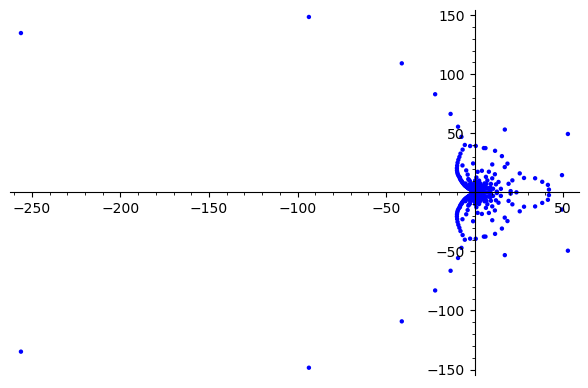

In [9]:
import pickle
rfile = open('/Users/barrybrent/2sept22no6.txt','rb')# deltaInfinityStrike Euler long exponent polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [198..198]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    print("polynomial: ",poly)
    poly=R(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        print("j: ",j)
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='blue',size=10)
    show(rootplot)

exponent:  199
polynomial:  1600/199*x^597 - 6400/199*x^596 + 19351055099779469447199379337479364341647798064152802313948755265815889404509934862554156862234984922345616218998249643408794332444689741025449353838033423604252512415175999056446705551268584087165231621828000510961106278434653559833683086184668768841382319088577792/795548230427177532654769868840289903037089471323709776474524227330056841838119302654116365123088099605573772855234952952766656978257786560041858519016256844591087531891598071798174204548734605826789955961003487174222631848842872979218428919621139909374337890625*x^595 - 2315287186623946906591024252362764364728682923473947420903162770910872281236959745896294141804628646702025722724059409262410474688895957915791291650112066310054014444503329764353581929954651931635978924645105461686464381658496416218816294630312299783014829030942947328/919477854262566997540688793131993355268997881429413309493168704954337053380740902565059115468895793513979737470874568739378548266328

j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
j:  19
j:  20
j:  21
j:  22
j:  23
j:  24
j:  25
j:  26
j:  27
j:  28
j:  29
j:  30
j:  31
j:  32
j:  33
j:  34
j:  35
j:  36
j:  37
j:  38
j:  39
j:  40
j:  41
j:  42
j:  43
j:  44
j:  45
j:  46
j:  47
j:  48
j:  49
j:  50
j:  51
j:  52
j:  53
j:  54
j:  55
j:  56
j:  57
j:  58
j:  59
j:  60
j:  61
j:  62
j:  63
j:  64
j:  65
j:  66
j:  67
j:  68
j:  69
j:  70
j:  71
j:  72
j:  73
j:  74
j:  75
j:  76
j:  77
j:  78
j:  79
j:  80
j:  81
j:  82
j:  83
j:  84
j:  85
j:  86
j:  87
j:  88
j:  89
j:  90
j:  91
j:  92
j:  93
j:  94
j:  95
j:  96
j:  97
j:  98
j:  99
j:  100
j:  101
j:  102
j:  103
j:  104
j:  105
j:  106
j:  107
j:  108
j:  109
j:  110
j:  111
j:  112
j:  113
j:  114
j:  115
j:  116
j:  117
j:  118
j:  119
j:  120
j:  121
j:  122
j:  123
j:  124
j:  125
j:  126
j:  127
j:  128
j:  129
j:  130
j:  131
j:  132
j:  133
j:  134
j:  135
j:  136
j:  137
j:  13

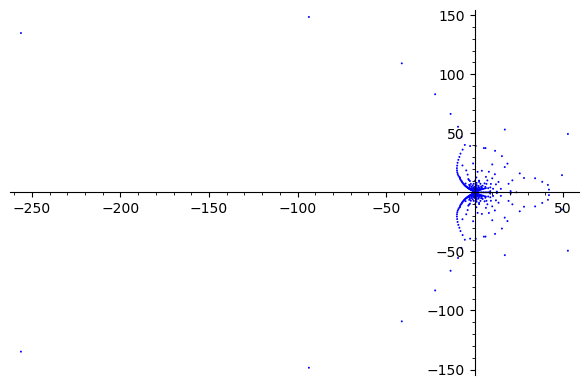

In [10]:
import pickle
rfile = open('/Users/barrybrent/2sept22no6.txt','rb')# deltaInfinityStrike Euler long exponent polynomials
rs=pickle.load(rfile)
rfile.close()
s=stripQuotationMarks(rs)
for k in [198..198]:
    print("=====================================================================================")
    print("exponent: ",s[k][0])
    points=[]
    poly=s[k][1]
    print("polynomial: ",poly)
    poly=R(poly)
    pr=poly.roots(CC)
    lpr=len(pr)
    roots=[]
    for j in [0..lpr-1]:
        print("j: ",j)
        root=pr[j][0]
        imroot=imaginary(root)
        rlroot=real(root)
        rootpair=(rlroot,imroot)
        roots=roots+[rootpair]
       
    rootplot=list_plot(roots,color='blue',size=2)
    show(rootplot)